In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [2]:
# Läs in datasetet från CSV-filerna
data1 = pd.read_csv(r'C:\Users\simon\energyconsumption\KwhConsumptionBlower78_1.csv')
data2 = pd.read_csv(r'C:\Users\simon\energyconsumption\KwhConsumptionBlower78_2.csv')
data3 = pd.read_csv(r'C:\Users\simon\energyconsumption\KwhConsumptionBlower78_3.csv')


In [3]:
# Kombinera dataseten
combined_data = pd.concat([data1, data2, data3], ignore_index=True)

# Spara den kombinerade datan till en CSV-fil
combined_data.to_csv('kombinerad_data.csv', index=False)

In [4]:
print(combined_data.head())

   Unnamed: 0      TxnDate   TxnTime  Consumption
0       76229  01 Jan 2022  16:55:52        1.010
1       76258  01 Jan 2022  21:45:29        0.908
2       76287  01 Jan 2022  12:24:52        0.926
3       76316  01 Jan 2022  04:07:36        0.928
4       76345  01 Jan 2022  06:52:25        0.916


In [5]:
# Radera "Unnamed: 0" kolumnen
combined_data = combined_data.drop(columns=['Unnamed: 0'])

In [6]:
print(combined_data.head())

       TxnDate   TxnTime  Consumption
0  01 Jan 2022  16:55:52        1.010
1  01 Jan 2022  21:45:29        0.908
2  01 Jan 2022  12:24:52        0.926
3  01 Jan 2022  04:07:36        0.928
4  01 Jan 2022  06:52:25        0.916


In [10]:
#inspektera antal rader i dataset för att ev radera nollvärden
# Skapa en kopia av den ursprungliga datan för att kunna jämföra ifall värden behöver tas bort
original_data = combined_data.copy()

In [11]:
# Visa rader med saknade värden innan borttagning
missing_rows = original_data[original_data.isna().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [TxnDate, TxnTime, Consumption]
Index: []


In [19]:
# Skapa en regressionsmodell - Linjär Regression
model_linear_regression = LinearRegression()

# Träna linjär regressionsmodellen med träningsdata
X_train_linear = train_data.index.astype(int).values.reshape(-1, 1)
y_train_linear = train_data['Consumption'].values
model_linear_regression.fit(X_train_linear, y_train_linear)

# Spara den tränade linjära regressionsmodellen till en fil
joblib.dump(model_linear_regression, 'trained_model_linear.pkl')


['trained_model_linear.pkl']

In [20]:
# Gör förutsägelser med testdata för linjär regression
X_test_linear = test_data.index.astype(int).values.reshape(-1, 1)
y_pred_linear = model_linear_regression.predict(X_test_linear)

# Beräkna Mean Squared Error för linjär regression
mse_linear = mean_squared_error(test_data['Consumption'], y_pred_linear)
print('Linear Regression Mean Squared Error:', mse_linear)

Linear Regression Mean Squared Error: 3.9534761848599174


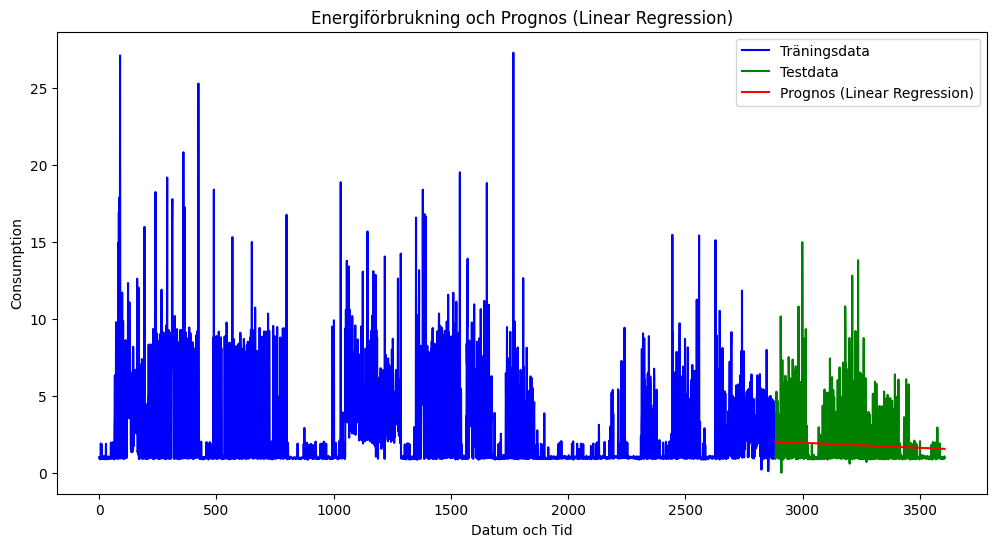

In [21]:
# Visualisera resultatet för linjär regression, inklusive träningsdata, testdata och prognos
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Consumption'], label='Träningsdata', color='blue')
plt.plot(test_data.index, test_data['Consumption'], label='Testdata', color='green')
plt.plot(test_data.index, y_pred_linear, label='Prognos (Linear Regression)', color='red')
plt.legend()
plt.title('Energiförbrukning och Prognos (Linear Regression)')
plt.xlabel('Datum och Tid')
plt.ylabel('Consumption')
plt.show()

In [14]:
# Skapa en regressionsmodell - Decision Tree Regressor
model_decision_tree = DecisionTreeRegressor(random_state=42)

# Träna beslutsträd-modellen med träningsdata
X_train_decision_tree = train_data.index.astype(int).values.reshape(-1, 1)
y_train_decision_tree = train_data['Consumption'].values
model_decision_tree.fit(X_train_decision_tree, y_train_decision_tree)


DecisionTreeRegressor(random_state=42)

In [15]:
# Spara den tränade beslutsträd-modellen till en fil
joblib.dump(model_decision_tree, 'trained_model_decision_tree.pkl')

['trained_model_decision_tree.pkl']

In [16]:
# Gör förutsägelser med testdata för Decision Tree Regressor
X_test_decision_tree = test_data.index.astype(int).values.reshape(-1, 1)
y_pred_decision_tree = model_decision_tree.predict(X_test_decision_tree)

# Beräkna Mean Squared Error för Decision Tree Regressor
mse_decision_tree = mean_squared_error(test_data['Consumption'], y_pred_decision_tree)
print('Decision Tree Regressor Mean Squared Error:', mse_decision_tree)

Decision Tree Regressor Mean Squared Error: 5.258909551246538


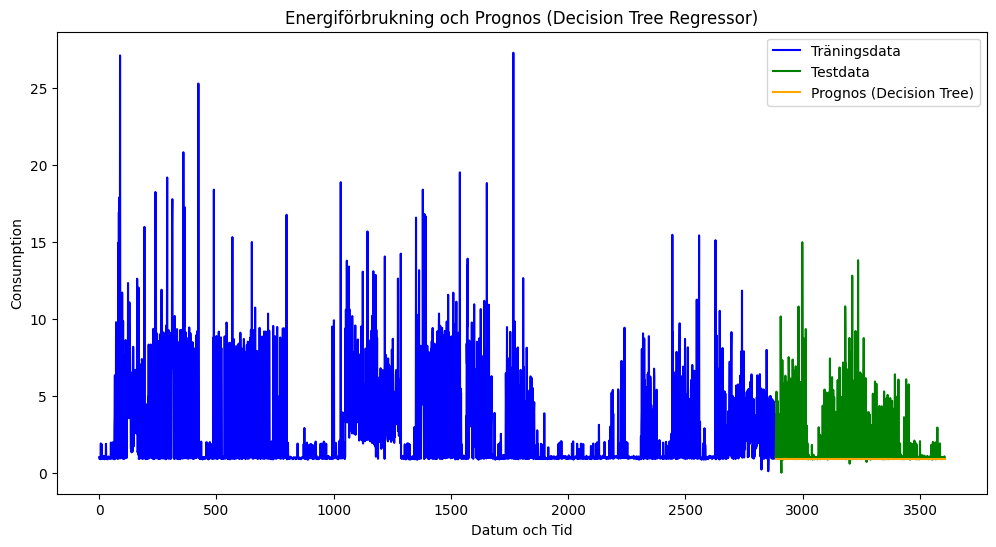

In [17]:
# Visualisera resultatet för Decision Tree Regressor, inklusive träningsdata, testdata och prognos
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Consumption'], label='Träningsdata', color='blue')
plt.plot(test_data.index, test_data['Consumption'], label='Testdata', color='green')
plt.plot(test_data.index, y_pred_decision_tree, label='Prognos (Decision Tree)', color='orange')
plt.legend()
plt.title('Energiförbrukning och Prognos (Decision Tree Regressor)')
plt.xlabel('Datum och Tid')
plt.ylabel('Consumption')
plt.show()